In [1]:
from open_atmos_jupyter_utils import show_plot

1. Narrative explaining the mathematical model, the type of solution, and the context (given units on the axes):

Plot from Lecture 1, slide 13th:
$$c(x,y)=\frac{M}{A}\frac{1}{2\sqrt{\pi D}}\frac{x}{t^{3/2}}\exp{[-\frac{(ut-x)^2}{4Dt}]}$$


This equation represents the concentration $c(x,y)$ of a substance at a point $(x,y)$ over time, that's based on the advection-diffutsion equation.  
It is derived from a deterministic model where the system evolves in the phase space due to internal dynamics. The model is based on solving a system of differential equations that describe the behavior of the modeled object.  

In [2]:
import numpy as np
import pint

import matplotlib.pyplot as plt
from open_atmos_jupyter_utils import show_plot

In [3]:
si = pint.UnitRegistry()

In [4]:
square_meter = si.meter * si.meter
cube_meter = si.meter * si.meter * si.meter

In [5]:
x = 1 * si.meter
t = 1 * si.second
M = 1 * si.kilogram
A = 1 * cube_meter / si.second
D = 1 * square_meter / si.second
u = 1 * si.meter / si.second # advection (flow) speed
c = 1 * si.kilogram / cube_meter # concentration

In [6]:
np.power(2, 3)

np.int64(8)

In [7]:
def concentration(x, t, M, A, D, u):
    return    (M / A) \
            * (1.0 / (2.0 * np.sqrt(np.pi * D))) \
            * (x / (np.power(t, 1.5))) \
            * np.exp((-1) * (np.power((u * t - x),2)) / (4.0 * D * t))

In [62]:
x = np.linspace(30, 100, 100) * si.meter
t = np.linspace(0.1,100, 100) * si.second
M = 0.5 * si.kilogram
D = 0.45 * square_meter / si.second
u = 1.35 * si.meter / si.second
c = concentration(x,t, M, A, D, u )

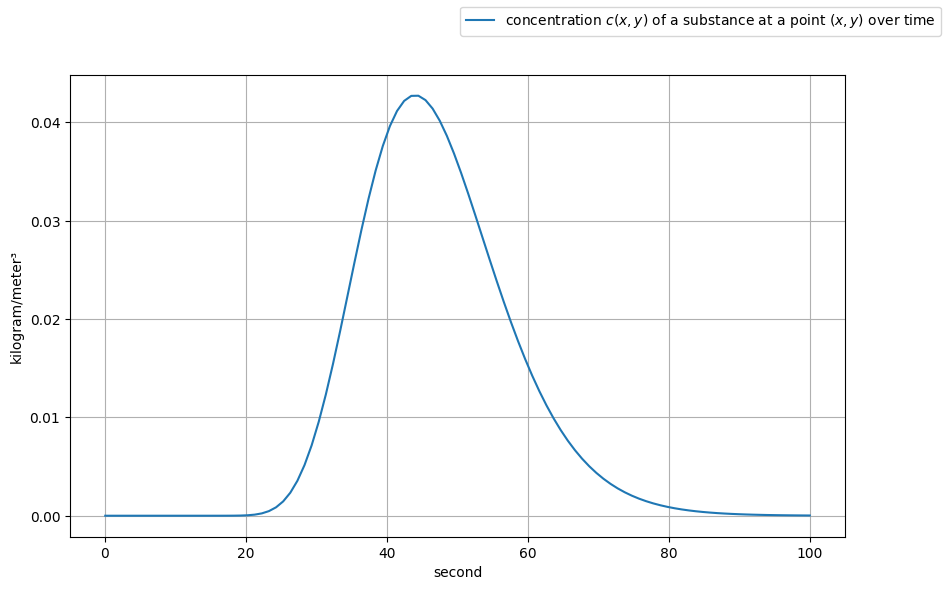

In [ ]:
si.setup_matplotlib()
def plot(fig, func, x, args):
    fig.gca().plot(x, func(*args), label='concentration $c(x,y)$ of a substance at a point $(x,y)$ over time')
    fig.legend()
    fig.gca().grid()

fig = plt.figure(figsize=(10, 6))
plot(fig, concentration,t, (x, t, M, A, D, u))

show_plot(fig=fig)

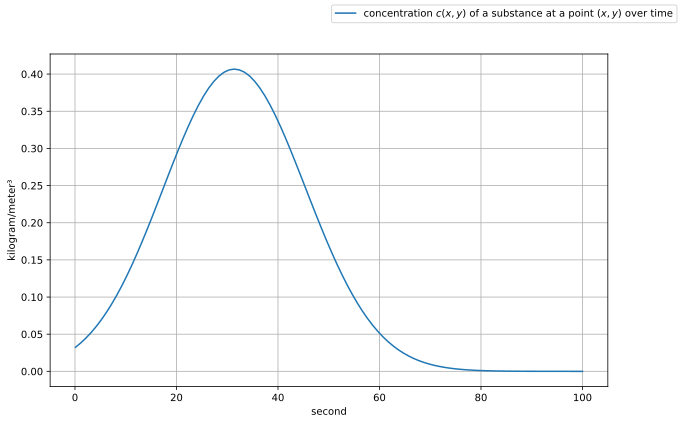

In [137]:
# c_snapshot = concentration(x, np.ones_like(x)*50 *si.seconds , M, A, D, u)
fig2 = plt.figure(figsize=(10, 6))
plot(fig2, concentration,t, (x, np.ones_like(x)*50 *si.seconds, M, A, D, u))
